<a href="https://colab.research.google.com/github/nchaudhary1/suicide_prevention/blob/main/Suicide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline 


In [ ]:
'''
svm( support vector machine) kinda similar to linear regression


'''

'\nsvm( support vector machine) kinda similar to linear regression\n\n\n'

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/master.csv')

In [ ]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [ ]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [ ]:
data.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [ ]:
data.shape

(27820, 12)

In [ ]:
data.drop(columns='HDI for year', inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8    gdp_for_year ($)   27820 non-null  object 
 9   gdp_per_capita ($)  27820 non-null  int64  
 10  generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.3+ MB


In [ ]:
data.nunique()

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides/100k pop      5298
country-year           2321
 gdp_for_year ($)      2321
gdp_per_capita ($)     2233
generation                6
dtype: int64

In [ ]:
data['country'].value_counts()

Mauritius                 382
Austria                   382
Netherlands               382
Iceland                   382
Brazil                    372
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Dominica                   12
Macau                      12
Mongolia                   10
Name: country, Length: 101, dtype: int64

In [ ]:
data['year'].value_counts()

2009    1068
2010    1056
2001    1056
2002    1032
2000    1032
2011    1032
2007    1032
2003    1032
2008    1020
2006    1020
2004    1008
2005    1008
1999     996
2012     972
2013     960
1998     948
1995     936
2014     936
1997     924
1996     924
1994     816
1993     780
1992     780
1990     768
1991     768
2015     744
1987     648
1989     624
1988     588
1986     576
1985     576
2016     160
Name: year, dtype: int64

In [ ]:
data['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [ ]:
data['age'].replace({'15-24 years':'20'}, inplace = True)
data['age'].replace({'35-54 years':'45'}, inplace = True)
data['age'].replace({'25-34 years':'30'}, inplace = True)
data['age'].replace({'55-74 years':'65'}, inplace = True)
data['age'].replace({'5-14 years':'11'}, inplace = True)
data['age'].replace({'75+ years':'88'}, inplace = True)

In [ ]:
data['age'].unique()
data['age']= pd.to_numeric(data['age'], errors = 'coerce')

In [ ]:
data['age'].unique()

array([20, 45, 88, 30, 65, 11])

In [ ]:
data.country.value_counts()

Mauritius                 382
Austria                   382
Netherlands               382
Iceland                   382
Brazil                    372
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Dominica                   12
Macau                      12
Mongolia                   10
Name: country, Length: 101, dtype: int64

In [ ]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,20,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,45,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,20,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,88,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,30,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


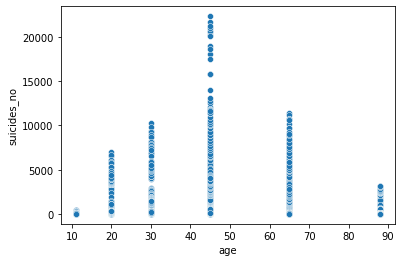

In [ ]:
sns.scatterplot(data['age'], data['suicides_no'])

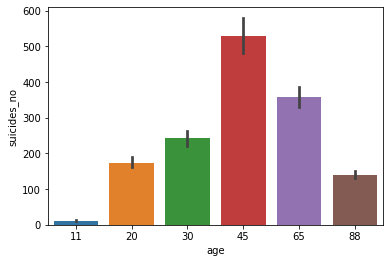

In [ ]:
sns.barplot(data['age'], data['suicides_no'])

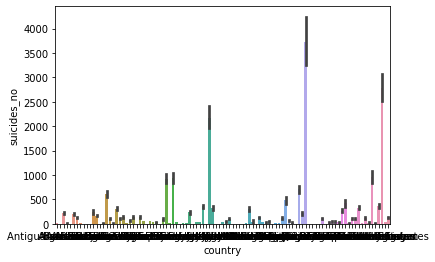

In [ ]:
sns.barplot(data['country'],data['suicides_no'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  int64  
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8    gdp_for_year ($)   27820 non-null  object 
 9   gdp_per_capita ($)  27820 non-null  int64  
 10  generation          27820 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 2.3+ MB


In [ ]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,20,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,45,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,20,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,88,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,30,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [ ]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [ ]:
data = data.reindex()

In [ ]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,20,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,45,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,20,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,88,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,30,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data.loc[:,['country','sex','country-year',' gdp_for_year ($) ' ,'generation']] = data.loc[:,['country','sex','country-year',' gdp_for_year ($) ','generation']].apply(enc.fit_transform)


In [ ]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,0,1987,1,20,21,312900,6.71,0,726,796,2
1,0,1987,1,45,16,308000,5.19,0,726,796,5
2,0,1987,0,20,14,289700,4.83,0,726,796,2
3,0,1987,1,88,1,21800,4.59,0,726,796,1
4,0,1987,1,30,9,274300,3.28,0,726,796,0


In [ ]:
data.nunique()

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides/100k pop      5298
country-year           2321
 gdp_for_year ($)      2321
gdp_per_capita ($)     2233
generation                6
dtype: int64

In [ ]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data)

MinMaxScaler()

In [ ]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [ ]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,0,1987,1,20,21,312900,6.71,0,726,796,2
1,0,1987,1,45,16,308000,5.19,0,726,796,5
2,0,1987,0,20,14,289700,4.83,0,726,796,2
3,0,1987,1,88,1,21800,4.59,0,726,796,1
4,0,1987,1,30,9,274300,3.28,0,726,796,0


In [ ]:
data = pd.DataFrame(min_max_scaler.fit_transform(data))

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.064516,1.0,0.116883,0.000940,0.007137,0.029826,0.0,0.312931,0.004322,0.4
1,0.0,0.064516,1.0,0.441558,0.000716,0.007025,0.023070,0.0,0.312931,0.004322,1.0
2,0.0,0.064516,0.0,0.116883,0.000627,0.006607,0.021470,0.0,0.312931,0.004322,0.4
3,0.0,0.064516,1.0,1.000000,0.000045,0.000491,0.020403,0.0,0.312931,0.004322,0.2
4,0.0,0.064516,1.0,0.246753,0.000403,0.006256,0.014580,0.0,0.312931,0.004322,0.0


In [ ]:
data.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation']

In [ ]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,0.0,0.064516,1.0,0.116883,0.000940,0.007137,0.029826,0.0,0.312931,0.004322,0.4
1,0.0,0.064516,1.0,0.441558,0.000716,0.007025,0.023070,0.0,0.312931,0.004322,1.0
2,0.0,0.064516,0.0,0.116883,0.000627,0.006607,0.021470,0.0,0.312931,0.004322,0.4
3,0.0,0.064516,1.0,1.000000,0.000045,0.000491,0.020403,0.0,0.312931,0.004322,0.2
4,0.0,0.064516,1.0,0.246753,0.000403,0.006256,0.014580,0.0,0.312931,0.004322,0.0


In [ ]:
corr = data.corr()

In [ ]:
corr

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
country,1.000000e+00,2.276923e-02,-5.461542e-15,-1.049484e-04,0.118555,0.158896,0.055224,9.994466e-01,5.160130e-02,5.334082e-02,6.068990e-03
year,2.276923e-02,1.000000e+00,-1.233272e-16,2.424887e-03,-0.004546,0.008850,-0.039037,3.367635e-02,-6.110479e-02,3.391343e-01,2.683006e-01
sex,-5.461542e-15,-1.233272e-16,1.000000e+00,2.290780e-18,0.144629,-0.011242,0.391496,-5.441488e-15,-2.675257e-16,-2.982988e-16,-2.466367e-17
age,-1.049484e-04,2.424887e-03,2.290780e-18,1.000000e+00,0.051802,-0.084911,0.352449,-6.686228e-05,-4.883890e-04,6.489651e-04,6.071034e-02
suicides_no,1.185555e-01,-4.545958e-03,1.446292e-01,5.180163e-02,1.000000,0.616162,0.306604,1.196752e-01,-1.361862e-02,6.132975e-02,-7.062371e-02
population,1.588961e-01,8.850170e-03,-1.124208e-02,-8.491140e-02,0.616162,1.000000,0.008285,1.584269e-01,-2.774661e-02,8.150986e-02,-6.796261e-02
suicides/100k pop,5.522414e-02,-3.903680e-02,3.914965e-01,3.524491e-01,0.306604,0.008285,1.000000,5.630384e-02,-1.000955e-02,1.785134e-03,-4.982007e-02
country-year,9.994466e-01,3.367635e-02,-5.441488e-15,-6.686228e-05,0.119675,0.158427,0.056304,1.000000e+00,5.114100e-02,5.979911e-02,8.912739e-03
gdp_for_year ($),5.160130e-02,-6.110479e-02,-2.675257e-16,-4.883890e-04,-0.013619,-0.027747,-0.010010,5.114100e-02,1.000000e+00,-3.202702e-02,-1.636544e-02
gdp_per_capita ($),5.334082e-02,3.391343e-01,-2.982988e-16,6.489651e-04,0.061330,0.081510,0.001785,5.979911e-02,-3.202702e-02,1.000000e+00,8.289921e-02


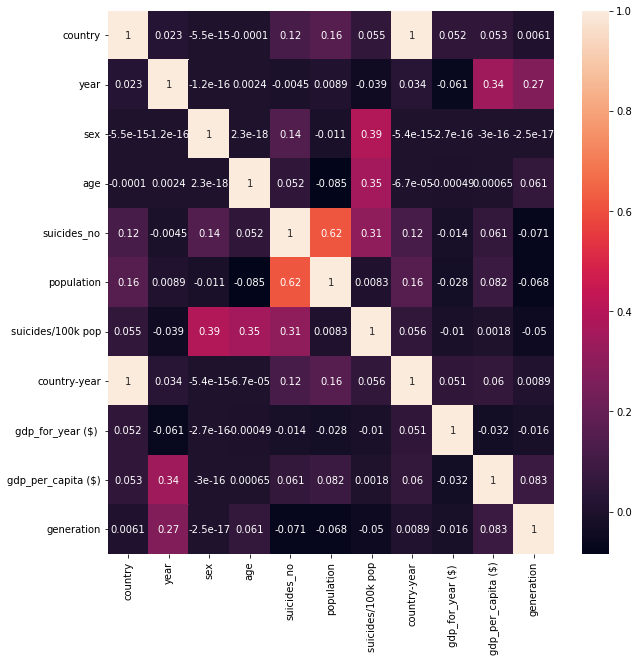

In [ ]:
plt.figure(figsize= (10,10))
sns.heatmap(corr, annot = True)

In [ ]:
data.corr()['suicides_no'].sort_values()

generation           -0.070624
 gdp_for_year ($)    -0.013619
year                 -0.004546
age                   0.051802
gdp_per_capita ($)    0.061330
country               0.118555
country-year          0.119675
sex                   0.144629
suicides/100k pop     0.306604
population            0.616162
suicides_no           1.000000
Name: suicides_no, dtype: float64

In [ ]:
#Highly corelated columns = population, suicides/100k pop, sex, country-year, country

In [ ]:
data.drop(columns=[' gdp_for_year ($) ','suicides/100k pop',
       'gdp_per_capita ($)', 'generation'], inplace = True)

In [ ]:
data.head()

,country,year,sex,age,suicides_no,population,country-year
0,0.0,0.064516,1.0,0.116883,0.000940,0.007137,0.0
1,0.0,0.064516,1.0,0.441558,0.000716,0.007025,0.0
2,0.0,0.064516,0.0,0.116883,0.000627,0.006607,0.0
3,0.0,0.064516,1.0,1.000000,0.000045,0.000491,0.0
4,0.0,0.064516,1.0,0.246753,0.000403,0.006256,0.0


In [ ]:
x = data.drop(['suicides_no'], axis = 1)
y =data['suicides_no']


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test= train_test_split(x,y, test_size = .30)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
y_test.shape

(19474, 6)
(8346, 6)
(19474,)


(8346,)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
predictions = model.predict(x_test)
predictions

array([ 0.00635864, -0.00377183, -0.00149594, ...,  0.07147238,
       -0.00725608, -0.01287726])

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, predictions)
score

0.3808409708815741

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

[22:32:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
preds = xgb.predict(x_test)
preds

array([ 0.00037819,  0.0003475 ,  0.00436547, ...,  0.01954743,
        0.00090697, -0.00127929], dtype=float32)

In [ ]:
print(r2_score(preds, y_test))

0.7969443506993148


In [ ]:
y_test

15430    0.000224
389      0.000000
22047    0.005238
15653    0.000000
8424     0.000045
           ...   
14547    0.001835
5883     0.003895
19018    0.000940
3712     0.001791
970      0.000000
Name: suicides_no, Length: 8346, dtype: float64

In [ ]:
x_test

,country,year,sex,age,population,country-year
15430,0.53,0.322581,1.0,0.116883,0.000553,0.554741
389,0.01,0.322581,0.0,1.000000,0.000028,0.013793
22047,0.80,0.612903,0.0,0.441558,0.024963,0.792672
15653,0.53,0.903226,1.0,0.000000,0.000711,0.562500
8424,0.30,0.483871,0.0,0.000000,0.002015,0.302586
...,...,...,...,...,...,...
14547,0.50,0.322581,0.0,0.116883,0.009410,0.522845
5883,0.20,0.645161,0.0,0.441558,0.126014,0.211207
19018,0.68,0.709677,1.0,0.000000,0.243796,0.683621
3712,0.12,0.709677,0.0,0.246753,0.015553,0.133190
